In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:/Users/Thinkpad/dataset/CombinedDataMentalhealth.csv", encoding="utf-8")

df.head(5)

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [2]:
df = df[["statement","status"]]

In [3]:
df["statement"].astype(str)

0                                               oh my gosh
1        trouble sleeping, confused mind, restless hear...
2        All wrong, back off dear, forward doubt. Stay ...
3        I've shifted my focus to something else but I'...
4        I'm restless and restless, it's been a month n...
                               ...                        
53038    Nobody takes me seriously I’ve (24M) dealt wit...
53039    selfishness  "I don't feel very good, it's lik...
53040    Is there any way to sleep better? I can't slee...
53041    Public speaking tips? Hi, all. I have to give ...
53042    I have really bad door anxiety! It's not about...
Name: statement, Length: 53043, dtype: object

In [4]:
df.dtypes

statement    object
status       object
dtype: object

In [5]:
df[df.isna().any(axis=1)]
df.status.unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [6]:
df.dropna(inplace=True)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000'),
  Text(16000.0, 0, '16000'),
  Text(18000.0, 0, '18000')])

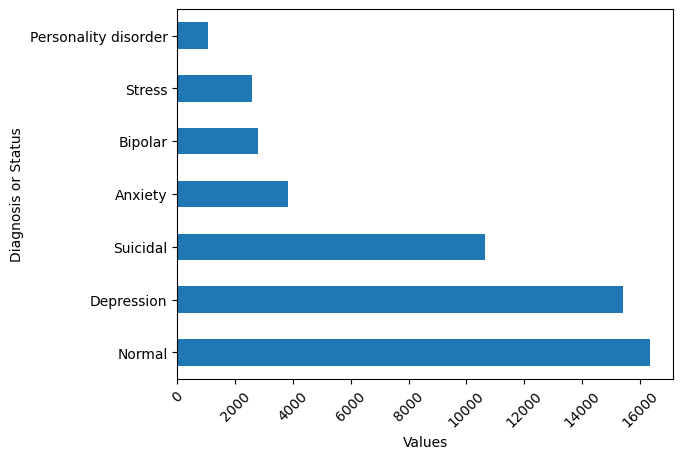

In [7]:
df.status.value_counts().plot(kind="barh")
plt.ylabel("Diagnosis or Status")
plt.xlabel("Values")
plt.xticks(rotation=45)

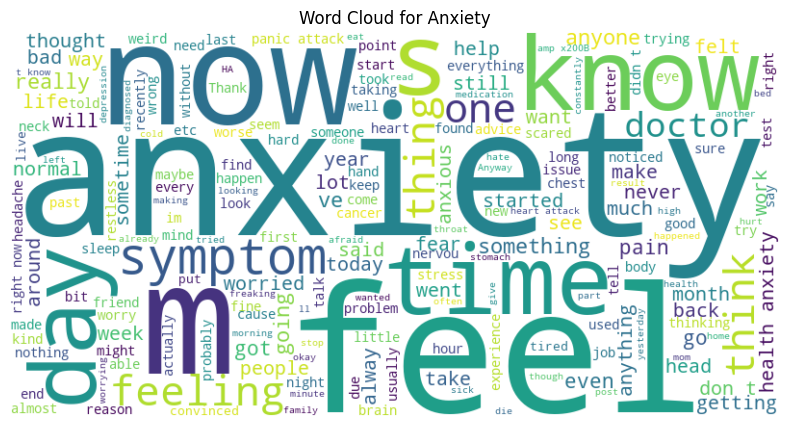

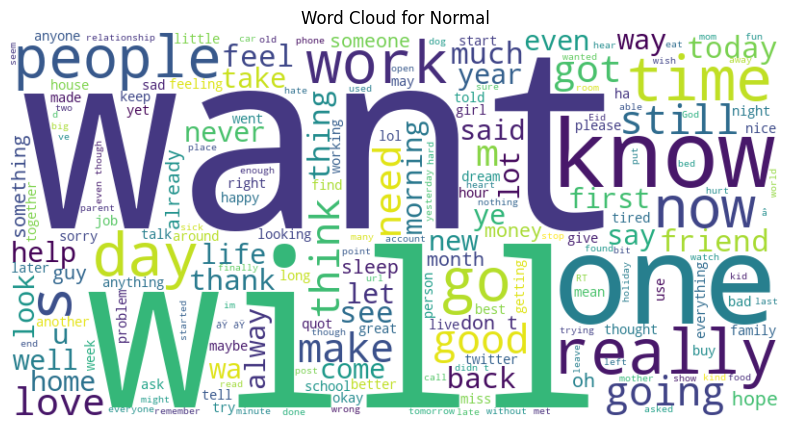

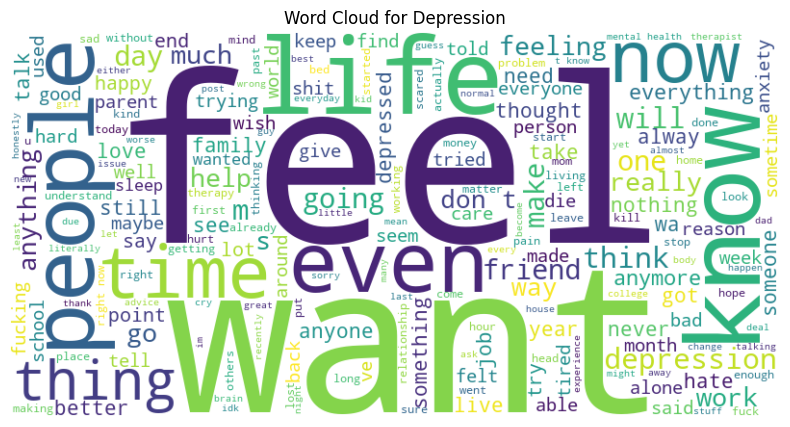

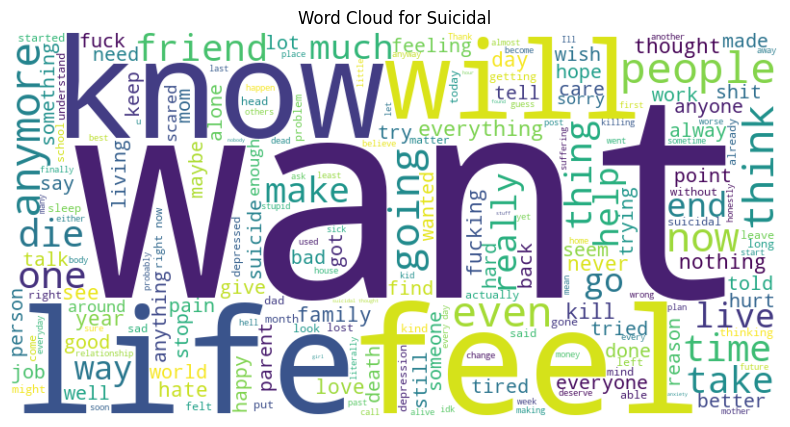

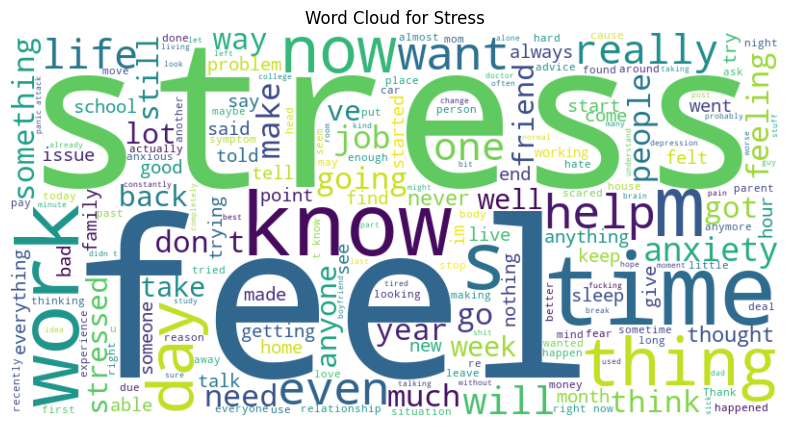

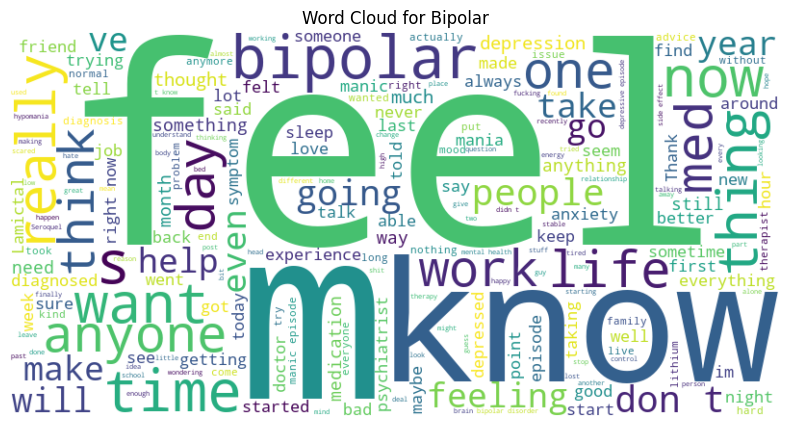

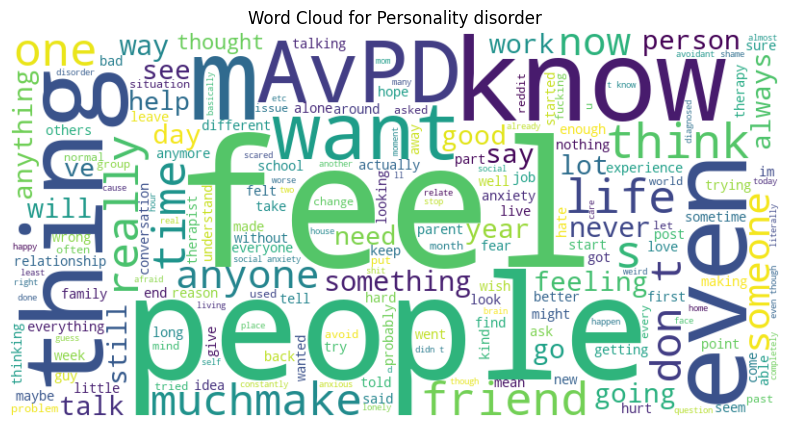

In [8]:
from wordcloud import WordCloud
statuses = df.status.unique()

for status in statuses:
    text = " ".join(df[df.status==status]["statement"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {status.capitalize()}")
    plt.axis('off')
    plt.show()

In [9]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from collections import Counter
import re

In [10]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [11]:
lemmatizer = WordNetLemmatizer()

df["statement"] = df['statement'].apply(lambda x : re.sub(r'(@\w+|\d+|[^\w\s])', '', x).lower().strip())

def clean_text(text):
    token_cleaned = [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in ENGLISH_STOP_WORDS and word.isalpha()]
    return token_cleaned
df["clean_statement"] = df["statement"].apply(clean_text)
df

,statement,status,clean_statement
0,oh my gosh,Anxiety,"[oh, gosh]"
1,trouble sleeping confused mind restless heart ...,Anxiety,"[trouble, sleeping, confused, mind, restless, ..."
2,all wrong back off dear forward doubt stay in ...,Anxiety,"[wrong, dear, forward, doubt, stay, restless, ..."
3,ive shifted my focus to something else but im ...,Anxiety,"[ive, shifted, focus, im, worried]"
4,im restless and restless its been a month now ...,Anxiety,"[im, restless, restless, month, boy, mean]"
...,...,...,...
53038,nobody takes me seriously ive m dealt with dep...,Anxiety,"[take, seriously, ive, m, dealt, depressionanx..."
53039,selfishness i dont feel very good its like i ...,Anxiety,"[selfishness, dont, feel, good, like, dont, be..."
53040,is there any way to sleep better i cant sleep ...,Anxiety,"[way, sleep, better, sleep, night, med, didnt,..."
53041,public speaking tips hi all i have to give a p...,Anxiety,"[public, speaking, tip, hi, presentation, work..."


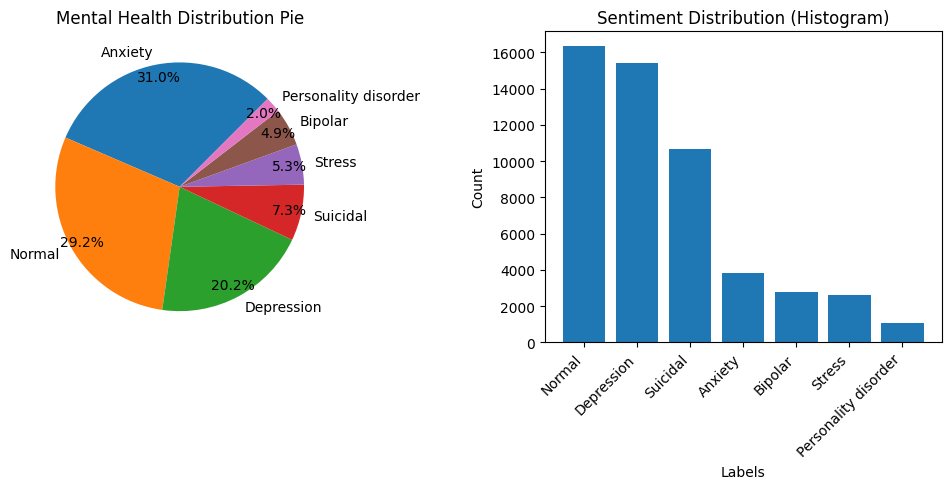

In [12]:
label_count = df.status.value_counts()

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(10,5))

axs1.pie(label_count, labels=df.status.unique(), autopct="%1.1f%%", startangle=45, pctdistance=0.9, labeldistance=1.1)
axs1.set_title("Mental Health Distribution Pie")

axs2.bar(label_count.index, label_count.values)
axs2.set_title('Sentiment Distribution (Histogram)')
axs2.set_xlabel('Labels')
axs2.set_ylabel('Count')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

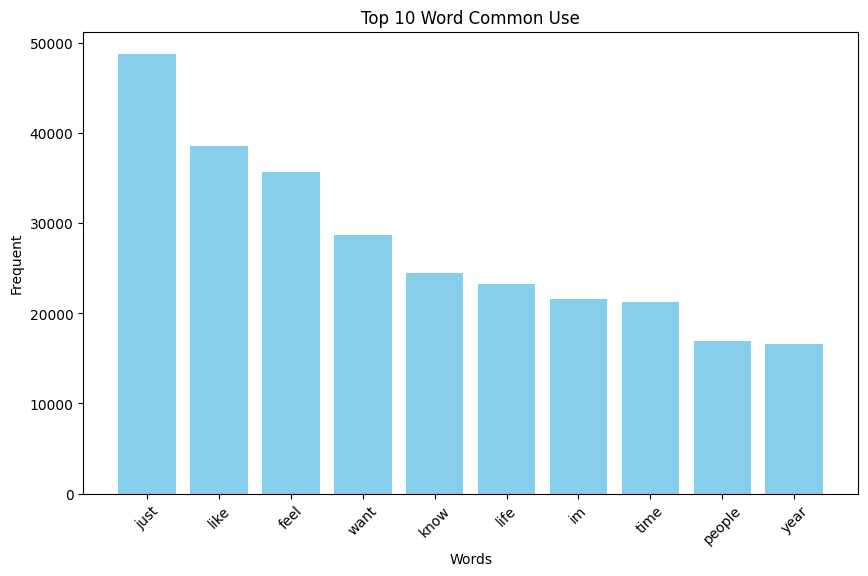

In [13]:
all_words = [word for token in df.clean_statement for word in token]

word_count = Counter(all_words)

most_commond_word_uses = word_count.most_common(10)

words, freq = zip(*most_commond_word_uses)

plt.figure(figsize=(10,6))

plt.bar(words, freq, color= "skyblue")
plt.title("Top 10 Word Common Use")
plt.xlabel("Words")
plt.ylabel("Frequent")
plt.xticks(rotation=45)

plt.show()

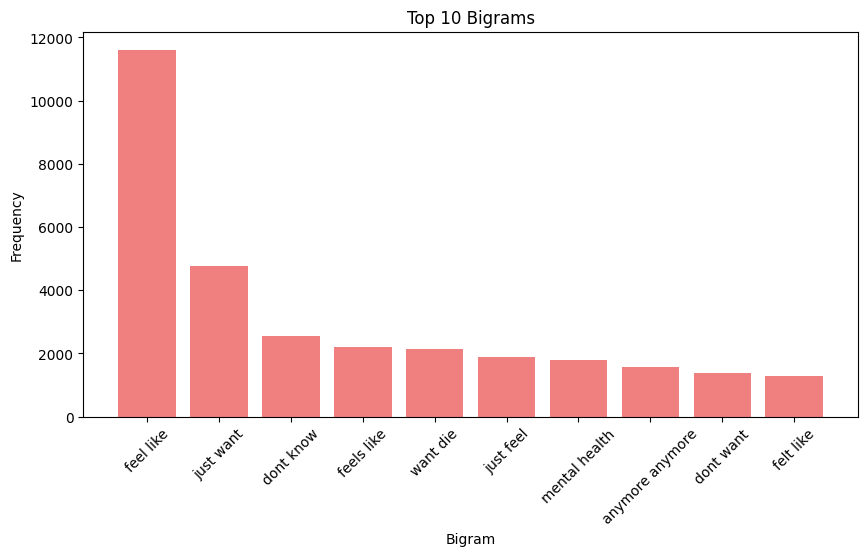

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cvectorizer = CountVectorizer(ngram_range = (2,2), stop_words="english")

X = cvectorizer.fit_transform(df.statement)
bigrams = X.sum(axis=0).A1

bigrams_dict = dict(zip(cvectorizer.get_feature_names_out(),bigrams))
sorted_bigrams = sorted(bigrams_dict.items(), key= lambda x: x[1], reverse=True)

bigrams, freq = zip(*sorted_bigrams[:10])

plt.figure(figsize=(10, 5))
plt.bar(bigrams, freq, color='lightcoral')
plt.title('Top 10 Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [45]:
from gensim.models import Word2Vec
import numpy as np

modelwv = Word2Vec(df['clean_statement'], vector_size=100, window=5, min_count=1, workers=4, negative=10, sg=1)

def text_to_vec(tokens, modelwv):
    word_vec = [modelwv.wv[word] for word in tokens if word in modelwv.wv]
    if len(word_vec) == 0:
        return np.zeros(modelwv.vector_size)
    return np.mean(word_vec, axis=0)

X = np.array([text_to_vec(text, model) for text in df.clean_statement.tolist()])

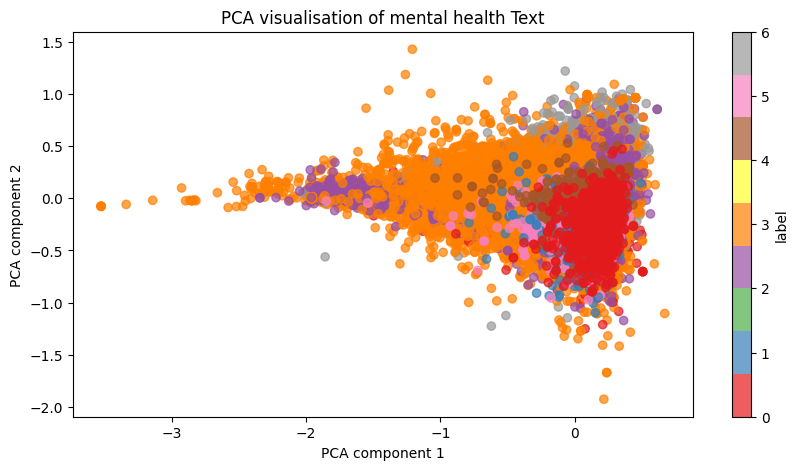

Variance explained by PC1: 0.18
Variance explained by PC2: 0.07


In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["status_enocoder"] = label_encoder.fit_transform(df.status)

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df.status_enocoder, cmap='Set1', alpha=0.7)
plt.title("PCA visualisation of mental health Text")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.colorbar(label="label")
plt.show()

print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.2f}")

In [104]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_pca, df["status"],stratify = df['status'], test_size=0.3, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from scipy.stats import uniform, randint
param_dist_rf = {
    'n_estimators': randint(50, 100),
    'max_depth': [1, 5],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': [ 'sqrt', 'log2']
}

rf = RandomForestClassifier()

random_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42, error_score="raise")
random_rf.fit(X_train, y_train)

#grid_search_rf = GridSearchCV(estimator=rf, param_grid=rf_param, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
#grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [1, 5],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CFDF545D90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CF8500F590>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CFDF96A600>},
                   random_state=42, verbose=2)

In [29]:
ab = AdaBoostClassifier(random_state=42, estimator=DecisionTreeClassifier(max_depth=1))
param_dist_adaboost = {
    'n_estimators': randint(50, 100),  # Number of boosting rounds
    'learning_rate': uniform(0.1, 1) # Learning rate
}

random_adaboost = RandomizedSearchCV(estimator=ab, param_distributions=param_dist_adaboost, n_iter=30, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_adaboost.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                                random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CFF20C5550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CFDF50A0F0>},
                   random_state=42, verbose=2)

In [30]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import time
start_time = time.time()
param_dist_xgb = {
    'n_estimators': randint(50, 100),  # Number of trees
    'learning_rate': uniform(0.01, 0.1),  # Step size at each iteration
    'max_depth': randint(3, 7),  # Maximum depth of a tree
    'subsample': uniform(0.7, 0.3),  # Fraction of samples used to fit trees
    'colsample_bytree': uniform(0.7, 0.3),  # Fraction of features to use for each tree
    'gamma': uniform(0, 0.2),  # Regularization term
    'min_child_weight': randint(1, 6)  # Minimum sum of instance weight for a child
}

xgb_model = xgb.XGBClassifier(tree_method='hist', random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


random_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb, n_iter=30, cv=3, n_jobs=-1, verbose=2, random_state=42, error_score="raise")
random_xgb.fit(X_train, y_train_encoded)
end_time = time.time()
print(f"Total training time: {end_time - start_time} seconds")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Total training time: 160.10809016227722 seconds


In [118]:
from tqdm import tqdm
svm = SVC()

svm_params = {
    "C" : [0.1, 1.0],
    "kernel" : ["linear", "rbf"],
    "gamma" : ["scale", "auto"]
}

random_svm = RandomizedSearchCV(estimator=svm, param_distributions= svm_params, n_iter=10 ,cv=2, random_state=42, n_jobs=-1)

with tqdm(total=10, desc="RandomizedSearchCV Progress") as pbar:
    # Fit the model and update progress bar during each iteration
        random_svm.fit(X_train, y_train)
        pbar.update(10)

C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
RandomizedSearchCV Progress: 100%|██████████| 10/10 [06:37<00:00, 39.70s/it]


In [119]:
rf_best_model = random_rf.best_estimator_
adaboost_best_model = random_adaboost.best_estimator_
xgboost_best_model = random_xgb.best_estimator_
svm_best_model = random_svm.best_estimator_

In [123]:
rf_predictions = rf_best_model.predict(X_test)  # Gantilah X_test dengan data yang ingin diprediksi

# Menggunakan model AdaBoost
adaboost_predictions = adaboost_best_model.predict(X_test)

# Menggunakan model XGBoost
xgboost_predictions = xgboost_best_model.predict(X_test)
xgboost_prediction = label_encoder.inverse_transform(xgboost_predictions)

svm_predictions = svm_best_model.predict(X_test)
#svm_prediction = label_encoder.inverse_transform(svm_predictions)
# Menampilkan hasil prediksi
print("Random Forest Predictions: ", rf_predictions[:10])
print(classification_report(y_test, rf_predictions))
print("\nAdaBoost Predictions: ", adaboost_predictions[:10])
print(classification_report(y_test, adaboost_predictions))
print("\nXGBoost Predictions: ", xgboost_prediction[:10])
print(classification_report(y_test, xgboost_prediction))
print("\nSVM Predictions: ", svm_predictions[:10])
print(classification_report(y_test, svm_predictions))

Random Forest Predictions:  ['Depression' 'Depression' 'Depression' 'Normal' 'Normal' 'Depression'
 'Depression' 'Depression' 'Normal' 'Normal']


C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

                      precision    recall  f1-score   support

             Anxiety       0.94      0.07      0.14      1152
             Bipolar       0.00      0.00      0.00       833
          Depression       0.43      0.85      0.57      4622
              Normal       0.70      0.92      0.79      4903
Personality disorder       0.00      0.00      0.00       323
              Stress       0.00      0.00      0.00       776
            Suicidal       0.80      0.02      0.03      3196

            accuracy                           0.54     15805
           macro avg       0.41      0.27      0.22     15805
        weighted avg       0.57      0.54      0.43     15805


AdaBoost Predictions:  ['Depression' 'Depression' 'Depression' 'Normal' 'Normal' 'Depression'
 'Depression' 'Depression' 'Normal' 'Normal']


C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                      precision    recall  f1-score   support

             Anxiety       0.59      0.53      0.56      1152
             Bipolar       0.42      0.12      0.19       833
          Depression       0.48      0.75      0.59      4622
              Normal       0.80      0.79      0.79      4903
Personality disorder       0.00      0.00      0.00       323
              Stress       0.38      0.06      0.11       776
            Suicidal       0.55      0.40      0.46      3196

            accuracy                           0.59     15805
           macro avg       0.46      0.38      0.39     15805
        weighted avg       0.58      0.59      0.57     15805


XGBoost Predictions:  ['Anxiety' 'Bipolar' 'Bipolar' 'Normal' 'Normal' 'Suicidal' 'Depression'
 'Depression' 'Normal' 'Suicidal']
                      precision    recall  f1-score   support

             Anxiety       0.85      0.79      0.82      1152
             Bipolar       0.83      0.70      0.76       8

In [72]:
from sklearn.pipeline import Pipeline

models_params = {
    "Random Forest":{
        "model" : RandomForestClassifier(random_state=42),
        "params" : {
            "n_estimators" : randint(50,100),
            'min_samples_split': randint(2, 10),
            'min_samples_leaf': randint(1, 5),
            'max_features': [ 'sqrt', 'log2']
        }
    },
    "Adaboost" : {
        "model" : AdaBoostClassifier(random_state=42, estimator=DecisionTreeClassifier(max_depth=1)),
        "params" : {
            "n_estimators" : randint(50,100),
            "learning_rate" : uniform(0.01, 0.5)
        }
    },
    "XGBoost" : {
        "model" : xgb.XGBClassifier(eval_metric = 'logloss', random_state=42),
        "params" : {
            "n_estimators" : randint(50,100),
            "max_depth" : randint(3, 7),
            "learning_rate" : uniform(0.01, 0.01),
            'subsample': uniform(0.7, 0.3),
            'colsample_bytree': uniform(0.7, 0.3),
            'gamma': uniform(0, 0.2),
            'min_child_weight': randint(1, 6) 
        }
    }
}

In [99]:
best_models = {}

for name, mp in models_params.items():
    print(f"Training {name}...")
    rnd = RandomizedSearchCV(
        mp["model"],
        param_distributions=mp["params"],
        n_iter=50,
        scoring='accuracy',
        verbose=2,
        cv= 3,
        random_state=42,
        n_jobs=-1,
        error_score='raise'
    )
    rnd.fit(X_train,y_train_encoded)
    best_models[name] = rnd.best_estimator_
    print(f"Best Params {name}: ", rnd.best_params_)

Training Random Forest...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Params Random Forest:  {'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 80}
Training Adaboost...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Params Adaboost:  {'learning_rate': 0.37450358402049366, 'n_estimators': 82}
Training XGBoost...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Params XGBoost:  {'colsample_bytree': 0.7358782737814905, 'gamma': 0.14264895744459902, 'learning_rate': 0.017607850486168974, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 58, 'subsample': 0.9131988669057362}


In [100]:
from lime.lime_text import LimeTextExplainer

class w2vwrapper:
    def __init__(self, model, modelwv, dim=50):
        self.model = model
        self.modelwv = modelwv
        self.pca = PCA(n_components=dim)
        
    def predict_prob(self, texts):
        vecs = []
        for t in texts:
            toks = t.split()
            vs = [self.modelwv.wv[w] for w in toks if w in self.modelwv.wv]
            vecs.append(np.mean(vs, axis=0) if vs else np.zeros(self.modelwv.vector_size))
        reduced_vecs = self.pca.fit_transform(np.vstack(vecs))
        return self.model.predict_proba(np.vstack(reduced_vecs))


In [101]:
class_names =['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder']
explainer = LimeTextExplainer(class_names=[str(c) for c in sorted(df['status'].unique())])
sample_test = str(df.iloc[2]['statement'])
print("\nSample text: ", sample_test)


Sample text:  all wrong back off dear forward doubt stay in a restless and restless place


In [102]:
for name, model in best_models.items():
    print(f'\n- Explanation for {name} -')
    wrapper = w2vwrapper(model, modelwv)
    exp = explainer.explain_instance(
        sample_test,
        wrapper.predict_prob,
        num_features=10
    )
    for word, weight in exp.as_list():
        print(f'{word}: {weight:.3f}')


- Explanation for Random Forest -
dear: 0.011
place: -0.009
restless: -0.007
forward: 0.006
wrong: -0.005
back: 0.003
stay: -0.001
and: -0.001
doubt: 0.001
in: 0.001

- Explanation for Adaboost -
restless: -0.000
place: 0.000
stay: 0.000
doubt: 0.000
dear: 0.000
forward: 0.000
back: 0.000
wrong: 0.000
off: 0.000
all: 0.000

- Explanation for XGBoost -
wrong: -0.000
place: 0.000
doubt: 0.000
restless: -0.000
stay: 0.000
forward: -0.000
dear: -0.000
a: 0.000
all: 0.000
and: -0.000


In [103]:
for name, model in best_models.items():
    print(f'\n=== Prediction by {name} ===')
    preds = model.predict(X_test)
    pred = label_encoder.inverse_transform(preds)
    print('Predict 10 first', preds[:10])
    print('Predict 10 first', pred[:10])
    print('\nClassification Report:')
    print(classification_report(y_test, pred))


=== Prediction by Random Forest ===
Predict 10 first [3 2 2 2 3 3 3 3 3 6]
Predict 10 first ['Normal' 'Depression' 'Depression' 'Depression' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Suicidal']

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.13      0.01      0.01      1152
             Bipolar       0.12      0.00      0.01       833
          Depression       0.30      0.44      0.36      4622
              Normal       0.32      0.56      0.41      4903
Personality disorder       0.00      0.00      0.00       323
              Stress       0.08      0.00      0.00       776
            Suicidal       0.13      0.02      0.04      3196

            accuracy                           0.31     15805
           macro avg       0.16      0.15      0.12     15805
        weighted avg       0.23      0.31      0.24     15805


=== Prediction by Adaboost ===


C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Predict 10 first [3 3 2 3 2 3 3 3 3 3]
Predict 10 first ['Normal' 'Normal' 'Depression' 'Normal' 'Depression' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal']

Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.00      0.00      0.00      1152
             Bipolar       0.00      0.00      0.00       833
          Depression       0.34      0.22      0.27      4622
              Normal       0.33      0.86      0.48      4903
Personality disorder       0.00      0.00      0.00       323
              Stress       0.00      0.00      0.00       776
            Suicidal       0.00      0.00      0.00      3196

            accuracy                           0.33     15805
           macro avg       0.10      0.15      0.11     15805
        weighted avg       0.20      0.33      0.23     15805


=== Prediction by XGBoost ===
Predict 10 first [3 2 3 3 3 3 3 3 3 3]
Predict 10 first ['Normal' 'Depression' 'Normal' 'Normal' 'Norma

C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

                      precision    recall  f1-score   support

             Anxiety       0.00      0.00      0.00      1152
             Bipolar       0.00      0.00      0.00       833
          Depression       0.34      0.22      0.27      4622
              Normal       0.32      0.83      0.46      4903
Personality disorder       0.00      0.00      0.00       323
              Stress       0.00      0.00      0.00       776
            Suicidal       0.00      0.00      0.00      3196

            accuracy                           0.32     15805
           macro avg       0.09      0.15      0.10     15805
        weighted avg       0.20      0.32      0.22     15805



C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Thinkpad\.julia\conda\3\x86_64\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
